In [12]:
import gymnasium as gym
import matplotlib.pyplot as plt
# from environments.MutilRoadEnv import RouteEnv
# from environments.ObsWrapper import FullRGBImgPartialObsWrapper
from minigrid.wrappers import RGBImgPartialObsWrapper, ImgObsWrapper
from ray.tune.registry import register_env
# gym.register(
#     id='MiniGrid-RandomPath-v0',
#     entry_point='environments.MutilRoadEnv:RouteEnv'
# )

In [4]:
_ = gym.make("MiniGrid-Empty-8x8-v0", render_mode="rgb_array")

In [10]:
_env_config = {
        "size": 20,
        "roads": (5, 7),
        "max_steps": 200,
        "battery":100,
        "render_mode": "human",
        "agent_pov": False
    }

In [33]:
# Build env
def env_creator(env_config):
    env = gym.make("MiniGrid-Empty-5x5-v0", render_mode="rgb_array")
    # env = RouteEnv(**env_config)
    # env = FullRGBImgPartialObsWrapper(env, tile_size=5)
    env = RGBImgPartialObsWrapper(env, tile_size=10)
#     env = TimeLimit(env, max_episode_steps=1000)
    return ImgObsWrapper(env)

register_env("RandomPath", env_creator)

env = env_creator(_env_config)
# env = env_creator(_env_config)
obs, _ = env.reset()
step = env.step(1)
print(env.action_space, env.observation_space)

Discrete(7) Box(0, 255, (70, 70, 3), uint8)


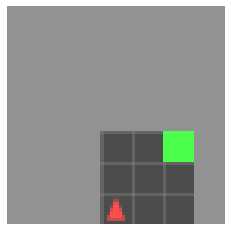

In [36]:
import matplotlib.pyplot as plt

obs, _ = env.reset()
# 使用matplotlib展示图像
plt.imshow(obs)
plt.axis('off')
plt.show()

In [10]:
import random
for i in range(100):
    j = 0
    while True:
        obs, reward, terminated, truncated, info = env.step(random.randint(0, 2))
        j += 1
        if terminated or truncated:
            print(i, j, terminated, truncated)
            if j <= 1:
                raise
            env.reset()
            break

0 195 False True
1 102 False True
2 100 False True
3 105 False True
4 100 False True
5 115 False True
6 120 False True
7 110 False True
8 102 False True
9 106 False True
10 102 False True
11 133 False True
12 100 False True
13 127 False True
14 103 False True
15 104 False True
16 101 False True
17 101 False True
18 100 False True
19 100 False True
20 104 False True
21 102 False True
22 102 False True
23 102 False True
24 106 False True
25 100 False True
26 134 False True
27 100 False True
28 157 False True
29 100 False True
30 126 False True
31 106 False True
32 111 False True
33 100 False True
34 103 False True
35 102 False True
36 102 False True
37 102 False True
38 100 False True
39 110 False True
40 132 False True
41 119 False True
42 106 False True
43 101 False True
44 102 False True
45 124 False True
46 151 False True
47 100 False True
48 101 False True
49 104 False True
50 163 False True
51 109 False True
52 101 False True
53 105 False True
54 100 False True
55 111 False True
56

In [11]:
# fig, ax = plt.subplots(dpi=50)
# ax.imshow(obs)
# ax.axis('off')  # Hide axes
# plt.show()

In [12]:
env.render()

In [13]:
env.max_steps

200